# Numpy and openCV
Build from scrach:
* Basic linear fitting 
* Rotate an image using Geometric Transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimization
import scipy.ndimage
import cv2
import math as m
%matplotlib inline

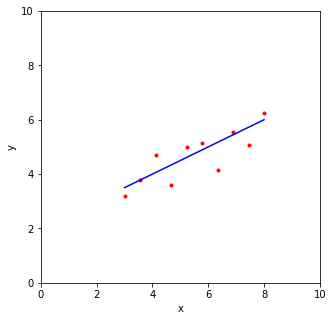

In [2]:
def data_gen(N=100, mu=0, sigma=.4, xstart=0, xend=1):
    '''
    Linear Regression self-made
    Data fitting
    '''
    x = np.linspace(xstart,xend,N)
    m, c = .5, 2    
    y = m * x + c + np.random.normal(mu, sigma, N)

    A = np.array((x, np.ones_like(x))).T
    fit = m*A + c

    return x,y,fit

x, y, fit = data_gen(N=10, xstart=3, xend=8)
#fit = np.polyfit(x, y, deg=1)
#fit_fn = np.poly1d(fit)



plt.figure(figsize=(5,5))
plt.plot(x,y,'r.', x, fit.T[0], 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

### Geometric Transformation Formula
M = $\begin{bmatrix} 
(1-\alpha).center(x) -\beta.center(y) \\
\beta.center(x) -(1-\alpha).center(y)
\end{bmatrix}$

where 
$\begin{matrix}
\alpha = scale.cos\theta\\
\beta = scale.sin\theta
\end{matrix}$

**source**: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [3]:
def getRMat(cx, cy, angle, scale):
    '''
    Generate Geometric Transformation Matrix
    '''
    a = scale*m.cos(angle*np.pi/180)
    b = scale*m.sin(angle*np.pi/180)
    u = (1-a)*cx - b*cy
    v = b*cx + (1-a)*cy
    return np.array([[a,b,u], [-b,a,v]]) 

In [4]:
def warpAff2(image, matrix, width, height):
    new_frame = np.zeros((height, width, 3), dtype=np.uint8)
    old_height, old_width = image.shape[:2]
    for u in range(width):
        for v in range(height):
            x = u*matrix[0,0]+v*matrix[0,1]+matrix[0,2]
            y = u*matrix[1,0]+v*matrix[1,1]+matrix[1,2]
            intx, inty = int(x), int(y)
            if 0 < intx < old_width and 0 < inty < old_height:
                pix = image[inty, intx]
                new_frame[v, u] = pix
    return new_frame

In [5]:
img = cv2.imread('dir/lena_std.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
#determine shape of img
h, w = img.shape[:2]
#determine center of image
cx, cy = (w / 2, h / 2)
angle = 30
mat = getRMat(cx, cy, int(angle), 1)
cos = mat[0,0]
sin  = mat[0,1]
newWidth = int((h * sin) + (w * cos))
newHeight = int((h * cos) + (w * sin))
mat[0,2] += cx - (newWidth / 2)
mat[1,2] += cy - (newHeight / 2)

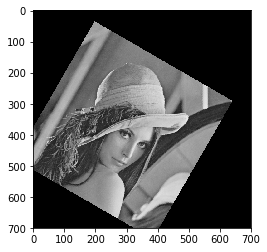

In [7]:
new_pic = warpAff2(img, mat, newWidth, newHeight)
plt.imshow(new_pic);

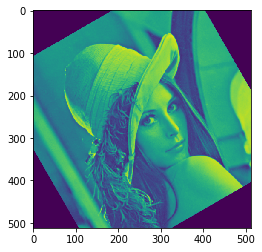

In [8]:
#Using built-in function from openCV

rows,cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst);